In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
# to convert the Labeles into one-hot-encode.
# The MNIST dataset has labels from 0 to 9. To train a/ neural network with a softmax output layer, you need the labels in one-hot encoded format.

from keras.initializers import he_normal

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten , BatchNormalization , Dropout

from keras.optimizers import Adam

from keras.losses import CategoricalCrossentropy

# Loading the Data Set for Train and Test:

In [2]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
print (x_test.shape , y_test.shape )

(10000, 28, 28) (10000,)


In [6]:
# we have 6000 train image and Labels and 1000 Test case with lables

In [7]:
y_test = to_categorical(y_test , num_classes= 10)
y_train = to_categorical(y_train , num_classes= 10)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# converting the Lables into categorical for prediction.

In [8]:
print ( x_train.shape , y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [38]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
print (x_test.shape , y_test.shape )

(10000, 28, 28, 1) (10000, 10)


In [39]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

# Model Building

In [10]:
print (x_train.shape , x_train.shape[0] , x_train.shape[1] , x_train.shape[2] )

(60000, 28, 28, 1) 60000 28 28


In [21]:
model = Sequential()
model.add(Conv2D(input_shape = (x_train.shape[1],x_train.shape[2],1) , filters = 64 , kernel_size = (3,3) ,strides= (2,2) ,padding= 'valid', activation = 'relu' , kernel_initializer = he_normal()))
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Conv2D(filters = 32 , kernel_size = (3,3) ,strides= (2,2) ,padding= 'valid', activation = 'relu' , kernel_initializer = he_normal()))
model.add(Flatten())
model.add(Dense(units = 100 , activation = 'relu' , kernel_initializer = he_normal()))
model.add(BatchNormalization())
model.add(Dense(units = 10 , activation = 'softmax' ))

In [22]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,550 (908.40 KB)

 Trainable params: 232,350 (907.62 KB)

 Non-trainable params: 200 (800.00 B)

In [23]:
adam_opitimizer = Adam()
category_loss = CategoricalCrossentropy()

In [24]:
model.compile(optimizer  = adam_opitimizer , loss = category_loss , metrics = ['accuracy'])

In [25]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [26]:
history = model.fit(x_train , y_train , epochs = 20 , batch_size = 10 , validation_data= (x_test , y_test), verbose= 1)

Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.9149 - loss: 0.2877 - val_accuracy: 0.9758 - val_loss: 0.0783
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9687 - loss: 0.1009 - val_accuracy: 0.9823 - val_loss: 0.0527
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.9769 - loss: 0.0758 - val_accuracy: 0.9841 - val_loss: 0.0474
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.9794 - loss: 0.0641 - val_accuracy: 0.9846 - val_loss: 0.0477
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9829 - loss: 0.0548 - val_accuracy: 0.9839 - val_loss: 0.0524
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9844 - loss: 0.0509 - val_accuracy: 0.9836 - val_loss: 0.0527
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9840 - val_loss: 0.0504
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9870 - loss: 0

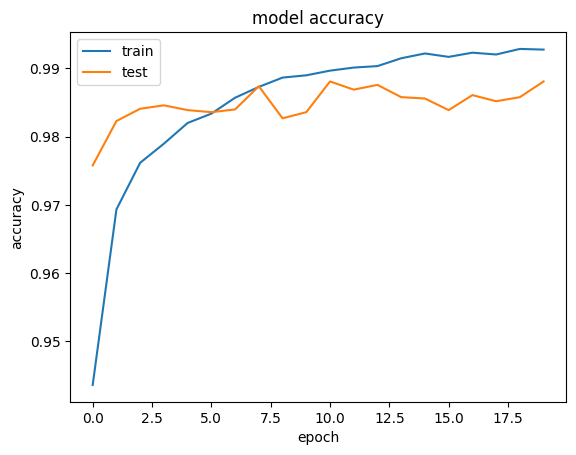

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
model.evaluate(x_train , y_train)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9994 - loss: 0.0023


[0.002584146335721016, 0.9991833567619324]

In [29]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9856 - loss: 0.0659


[0.0518236942589283, 0.988099992275238]

In [30]:
np.argmax(model.predict(x_test),axis = 1) # predicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [31]:
np.argmax(y_test , axis =1) # actual

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
model.save('mnist.h5',include_optimizer = False)

In [33]:
#import joblib
#joblib.dump(model, 'mnist_model.pkl')

In [34]:
from google.colab import files
files.download('mnist.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
#from tensorflow.keras.models import load_model


In [36]:
#model.save("mnist_model.keras")

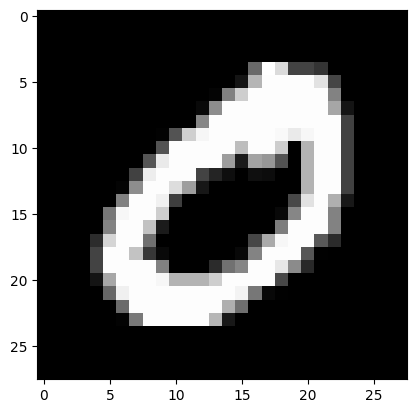

In [37]:
plt.imshow(x_train[119],cmap='gray')

In [41]:
# prompt: python version

import sys
sys.version

'3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]'